In [142]:
%matplotlib inline
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

lasio will automatically try and import pandas

In [2]:
skru = lasio.read("7220_8_1.las")

If [pandas](http://pandas.pydata.org/) is installed, you can use the df() method to get a pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) version of the data section:

In [3]:
df_input = skru.df()

In [4]:
list(df_input)

['AI',
 'AI_Fizz',
 'AI_Gas',
 'AI_ORG',
 'AI_Oil',
 'AI_Wet',
 'Aniso39',
 'Aniso39up',
 'BS',
 'CALI',
 'Delta_Backus',
 'Epsilon_Backus',
 'GR',
 'Gamma_Backus',
 'MARKER_FS',
 'NPHI',
 'Output',
 'PHIE',
 'PPORE',
 'PR',
 'PR_ORG',
 'Phi_T',
 'Pr_Fizz',
 'Pr_Gas',
 'Pr_Oil',
 'Pr_Wet',
 'RESD_HC20_Simandoux',
 'RESD_HC80_Simandoux',
 'RESD_Wet_Simandoux',
 'RES_D',
 'RES_M',
 'RES_S',
 'RH39_1DF',
 'RH39_1DF_1',
 'RH39_1DF_2',
 'RH39_1DF_3',
 'RH39up',
 'RH54_1DF',
 'RH54_1DF_1',
 'RH54_1DF_2',
 'RH54_1DF_3',
 'RH54up',
 'RH72_1DF',
 'RH72_1DF_1',
 'RH72_1DF_2',
 'RH72_1DF_3',
 'RH72up',
 'RHOB',
 'RHOB_ORG',
 'RHO_Backus',
 'RV39_1DF',
 'RV39_1DF_1',
 'RV39_1DF_2',
 'RV39_1DF_3',
 'RV39up',
 'RV54_1DF',
 'RV54_1DF_1',
 'RV54_1DF_2',
 'RV54_1DF_3',
 'RV54up',
 'RV72_1DF',
 'RV72_1DF_1',
 'RV72_1DF_2',
 'RV72_1DF_3',
 'RV72up',
 'Rhob_Fizz',
 'Rhob_Gas',
 'Rhob_Oil',
 'Rhob_Wet',
 'SG',
 'SO',
 'SW',
 'TEMP',
 'TVD',
 'VAnhydrite',
 'VCalcite',
 'VClay',
 'VCoal',
 'VDolomite',
 'VF

In [516]:
#df = df_input[['PHIE', 'RES_D', 'RHOB', 'RV72_1DF', 'SW', 'VP']].copy()
#df = df[df['SW']>.99999]
df = df_input[['PHIE', 'RHOB', 'VP', 'GR', 'NPHI', 'VS', 'RES_D', 'RH72_1DF', 'RV72_1DF']].copy()
df = df.dropna()
df = df[(df.index<1276) | (df.index>1532)]
#df['Aniso_RV72RESD'] = df.RV72_1DF / df.RES_D
#df['Aniso_RV72RH72'] = df.RV72_1DF / df.RH72_1DF
df['log10_RV'] = np.log10(df['RV72_1DF'])
df['log10_RESD'] = np.log10(df['RES_D'])
df['log10_RH'] = np.log10(df['RH72_1DF'])

In [517]:
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.index >= top_depth) & (df.index <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)
    
#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        #for (i,j) in zip(tops_depths,tops):
        #    if ((i>=top_depth) and (i<=bottom_depth)):
        #        axes.axhline(y=i, linewidth=0.5, color='black')
        #        axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
#1st track: VP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(logs.VP.min(),logs.VP.max())
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("VP [m/s]")
    ax01.plot(logs.VP, logs.index, label='VP[m/s]', color='blue')
    ax01.set_xlabel('VP[m/s]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)        
    
#2nd track: RHOB track
    
    ax11=ax[1].twiny()
    ax11.set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax11.spines['top'].set_position(('outward',0))
    ax11.set_xlabel("RHOB [units]")
    ax11.plot(logs.RHOB, logs.index, label='RHOB[units]', color='blue')
    ax11.set_xlabel('RHOB[units]',color='blue')    
    ax11.tick_params(axis='x', colors='blue')
    ax11.grid(True)  

#3rd track: PHIE track
    
    ax21=ax[2].twiny()
    ax21.set_xlim(0,0.4)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel("PHIE [units]")
    ax21.plot(logs.PHIE, logs.index, label='PHIE[units]', color='blue')
    ax21.set_xlabel('PHIE[units]',color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    ax21.grid(True)
    
    #ax22=ax[2].twiny()
    #ax22.set_xlim(0,1)
    #ax22.spines['top'].set_position(('outward',40))
    #ax22.set_xlabel("SW [units]")
    #ax22.plot(logs.SW, logs.index, label='SW[units]', color='black')
    #ax22.set_xlabel('SW[units]',color='black')    
    #ax22.tick_params(axis='x', colors='black')
    #ax22.grid(True)  
    
#2nd track: Resistivities

    ax31=ax[3].twiny()
    ax31.set_xlim(0.2,200)
    ax31.set_xscale('log')
    ax31.grid(True)
    ax31.spines['top'].set_position(('outward',40))
    ax31.set_xlabel('RES_D[m.ohm]', color='blue')
    ax31.plot(logs.RES_D, logs.index, label='RES_D[m.ohm]', color='blue')
    ax31.tick_params(axis='x', colors='blue')    
    
    ax32=ax[3].twiny()
    ax32.set_xlim(0.2,200)
    ax32.set_xscale('log')
    ax32.plot(logs.RV72_1DF, logs.index, label='RV72_1DF[m.ohm]', color='black') 
    ax32.spines['top'].set_position(('outward',0))
    ax32.set_xlabel('RV72_1DF[m.ohm]', color='black')    
    ax32.tick_params(axis='x', colors='black')


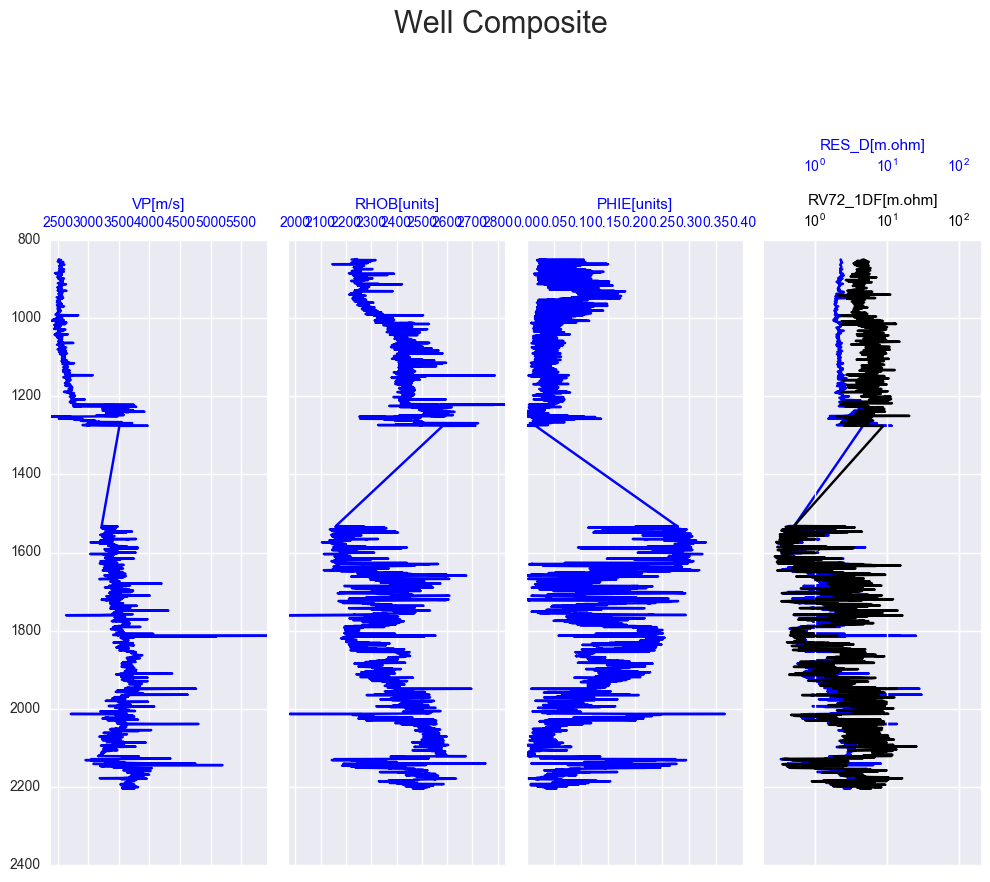

In [518]:
triple_combo_plot(df.index.min(),df.index.max())
#triple_combo_plot(1250,1550)
plt.show()

In [519]:
df.iloc[0:5]

,PHIE,RHOB,VP,GR,NPHI,VS,RES_D,RH72_1DF,RV72_1DF,log10_RV,log10_RESD,log10_RH
Depth,,,,,,,,,,,,
849.9348,0.024806,2222.6,2515.3407,61.5039,0.3665,1212.6843,2.2818,2.2623,4.8029,0.681504,0.358278,0.354550
850.0872,0.024624,2225.4,2518.3542,54.7915,0.3462,1206.2286,2.2816,2.2726,4.7976,0.681024,0.358240,0.356523
850.2396,0.034700,2245.9,2525.0238,53.8017,0.3499,1200.5832,2.2825,2.2870,4.7625,0.677835,0.358411,0.359266
850.3920,0.023794,2238.2,2525.4611,54.9259,0.3601,1199.6892,2.2848,2.2989,4.6826,0.670487,0.358848,0.361520
850.5444,0.026583,2236.9,2522.9797,54.4946,0.3695,1198.2126,2.2894,2.3043,4.5867,0.661500,0.359722,0.362539


In [520]:
from sklearn import preprocessing

In [521]:
instance_count, attr_count = df.shape

In [522]:
instance_count

7208

In [523]:
attr_count

12

In [524]:
df.describe()

,PHIE,RHOB,VP,GR,NPHI,VS,RES_D,RH72_1DF,RV72_1DF,log10_RV,log10_RESD,log10_RH
count,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000
mean,0.104276,2370.726138,3194.515534,81.607583,0.315533,1667.376181,2.059897,1.746793,4.070186,0.457930,0.239068,0.156636
std,0.084623,118.235671,480.372328,29.708152,0.062550,400.578529,1.225083,0.933979,2.831178,0.417314,0.278113,0.304587
min,0.001000,1973.900000,2386.144500,10.095000,0.108800,966.710100,0.304200,0.276400,0.277900,-0.556111,-0.516841,-0.558462
25%,0.036153,2265.075000,2624.959825,58.785425,0.264600,1198.989575,1.185525,0.824750,1.647400,0.216799,0.073911,-0.083678
50%,0.074719,2388.500000,3372.143950,82.806950,0.308000,1820.523000,2.167150,2.036700,3.899150,0.590970,0.335889,0.308927
75%,0.156789,2451.900000,3572.997000,108.028750,0.359625,1996.260050,2.614475,2.317825,5.869500,0.768601,0.417384,0.365081
max,0.366802,2828.100000,5923.855800,162.359800,0.636700,2809.973300,30.369800,20.260600,25.730600,1.410450,1.482442,1.306652


In [525]:
df.corr(method='pearson')

,PHIE,RHOB,VP,GR,NPHI,VS,RES_D,RH72_1DF,RV72_1DF,log10_RV,log10_RESD,log10_RH
PHIE,1.000000,-0.798834,0.356806,-0.801856,-0.563551,0.475725,-0.670536,-0.831377,-0.722477,-0.872013,-0.902709,-0.930160
RHOB,-0.798834,1.000000,0.139101,0.767739,0.252975,-0.016989,0.675351,0.693731,0.607008,0.685859,0.791993,0.733992
VP,0.356806,0.139101,1.000000,-0.193796,-0.797749,0.970431,0.027862,-0.320720,-0.360089,-0.386363,-0.162339,-0.367084
GR,-0.801856,0.767739,-0.193796,1.000000,0.571363,-0.328605,0.481163,0.597040,0.609401,0.683294,0.684539,0.682270
NPHI,-0.563551,0.252975,-0.797749,0.571363,1.000000,-0.846493,0.173827,0.443716,0.546594,0.560933,0.368392,0.513248
VS,0.475725,-0.016989,0.970431,-0.328605,-0.846493,1.000000,-0.107420,-0.420941,-0.455290,-0.477763,-0.285383,-0.467706
RES_D,-0.670536,0.675351,0.027862,0.481163,0.173827,-0.107420,1.000000,0.694805,0.534148,0.617817,0.839629,0.707544
RH72_1DF,-0.831377,0.693731,-0.320720,0.597040,0.443716,-0.420941,0.694805,1.000000,0.727767,0.808473,0.840261,0.933186
RV72_1DF,-0.722477,0.607008,-0.360089,0.609401,0.546594,-0.455290,0.534148,0.727767,1.000000,0.901533,0.672526,0.744421
log10_RV,-0.872013,0.685859,-0.386363,0.683294,0.560933,-0.477763,0.617817,0.808473,0.901533,1.000000,0.841874,0.900425


In [526]:
df.corr(method='spearman')

,PHIE,RHOB,VP,GR,NPHI,VS,RES_D,RH72_1DF,RV72_1DF,log10_RV,log10_RESD,log10_RH
PHIE,1.000000,-0.770994,0.352062,-0.774334,-0.622066,0.519775,-0.754282,-0.824875,-0.766552,-0.766552,-0.754282,-0.824875
RHOB,-0.770994,1.000000,0.175140,0.752756,0.279252,-0.059777,0.807469,0.726803,0.642686,0.642686,0.807469,0.726803
VP,0.352062,0.175140,1.000000,-0.156285,-0.778662,0.936596,-0.003783,-0.254223,-0.332395,-0.332395,-0.003783,-0.254223
GR,-0.774334,0.752756,-0.156285,1.000000,0.571394,-0.379578,0.597529,0.592386,0.632416,0.632416,0.597529,0.592386
NPHI,-0.622066,0.279252,-0.778662,0.571394,1.000000,-0.860078,0.328097,0.508961,0.589337,0.589337,0.328097,0.508961
VS,0.519775,-0.059777,0.936596,-0.379578,-0.860078,1.000000,-0.173500,-0.408733,-0.480274,-0.480274,-0.173500,-0.408733
RES_D,-0.754282,0.807469,-0.003783,0.597529,0.328097,-0.173500,1.000000,0.872614,0.680122,0.680122,1.000000,0.872614
RH72_1DF,-0.824875,0.726803,-0.254223,0.592386,0.508961,-0.408733,0.872614,1.000000,0.788721,0.788721,0.872614,1.000000
RV72_1DF,-0.766552,0.642686,-0.332395,0.632416,0.589337,-0.480274,0.680122,0.788721,1.000000,1.000000,0.680122,0.788721
log10_RV,-0.766552,0.642686,-0.332395,0.632416,0.589337,-0.480274,0.680122,0.788721,1.000000,1.000000,0.680122,0.788721


In [527]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
corr_with_target.sort_values(ascending=False,inplace=True)

In [528]:
corr_with_target

RH72_1DF      0.933186
log10_RESD    0.932694
log10_RV      0.900425
RV72_1DF      0.744421
RHOB          0.733992
RES_D         0.707544
GR            0.682270
NPHI          0.513248
VP           -0.367084
VS           -0.467706
PHIE         -0.930160
Name: log10_RH, dtype: float64

In [529]:
corr_with_rh = pearson.ix[-2][:-2]
corr_with_rh.sort_values(ascending=False,inplace=True)

In [530]:
corr_with_rh

log10_RV    0.841874
RH72_1DF    0.840261
RES_D       0.839629
RHOB        0.791993
GR          0.684539
RV72_1DF    0.672526
NPHI        0.368392
VP         -0.162339
VS         -0.285383
PHIE       -0.902709
Name: log10_RESD, dtype: float64

In [531]:
corr_with_resd = pearson.ix[-3][:-3]
corr_with_resd.sort_values(ascending=False,inplace=True)
corr_with_resd

RV72_1DF    0.901533
RH72_1DF    0.808473
RHOB        0.685859
GR          0.683294
RES_D       0.617817
NPHI        0.560933
VP         -0.386363
VS         -0.477763
PHIE       -0.872013
Name: log10_RV, dtype: float64

In [532]:
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,attribute pair,correlation
28,"(VP, VS)",0.970431
32,"(PHIE, log10_RESD)",-0.902709
14,"(RV72_1DF, log10_RV)",0.901533
1,"(PHIE, log10_RV)",-0.872013
13,"(NPHI, VS)",-0.846493
18,"(log10_RESD, log10_RV)",0.841874
8,"(RH72_1DF, log10_RESD)",0.840261
7,"(RES_D, log10_RESD)",0.839629
0,"(PHIE, RH72_1DF)",-0.831377
22,"(RH72_1DF, log10_RV)",0.808473


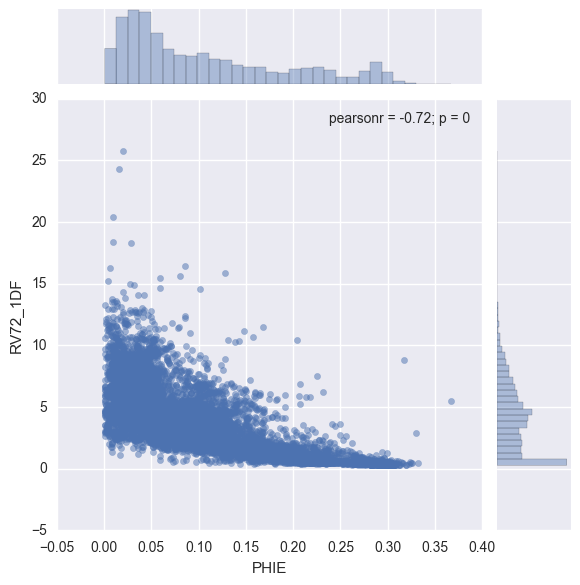

In [533]:
#plt.scatter(df['PHIE'], df['RV72_1DF'])
sns.jointplot(df['PHIE'], df['RV72_1DF'], kind='scatter', joint_kws={'alpha':0.5})

In [534]:
#ax = sns.heatmap(df) # compute and plot the pair-wise correlations

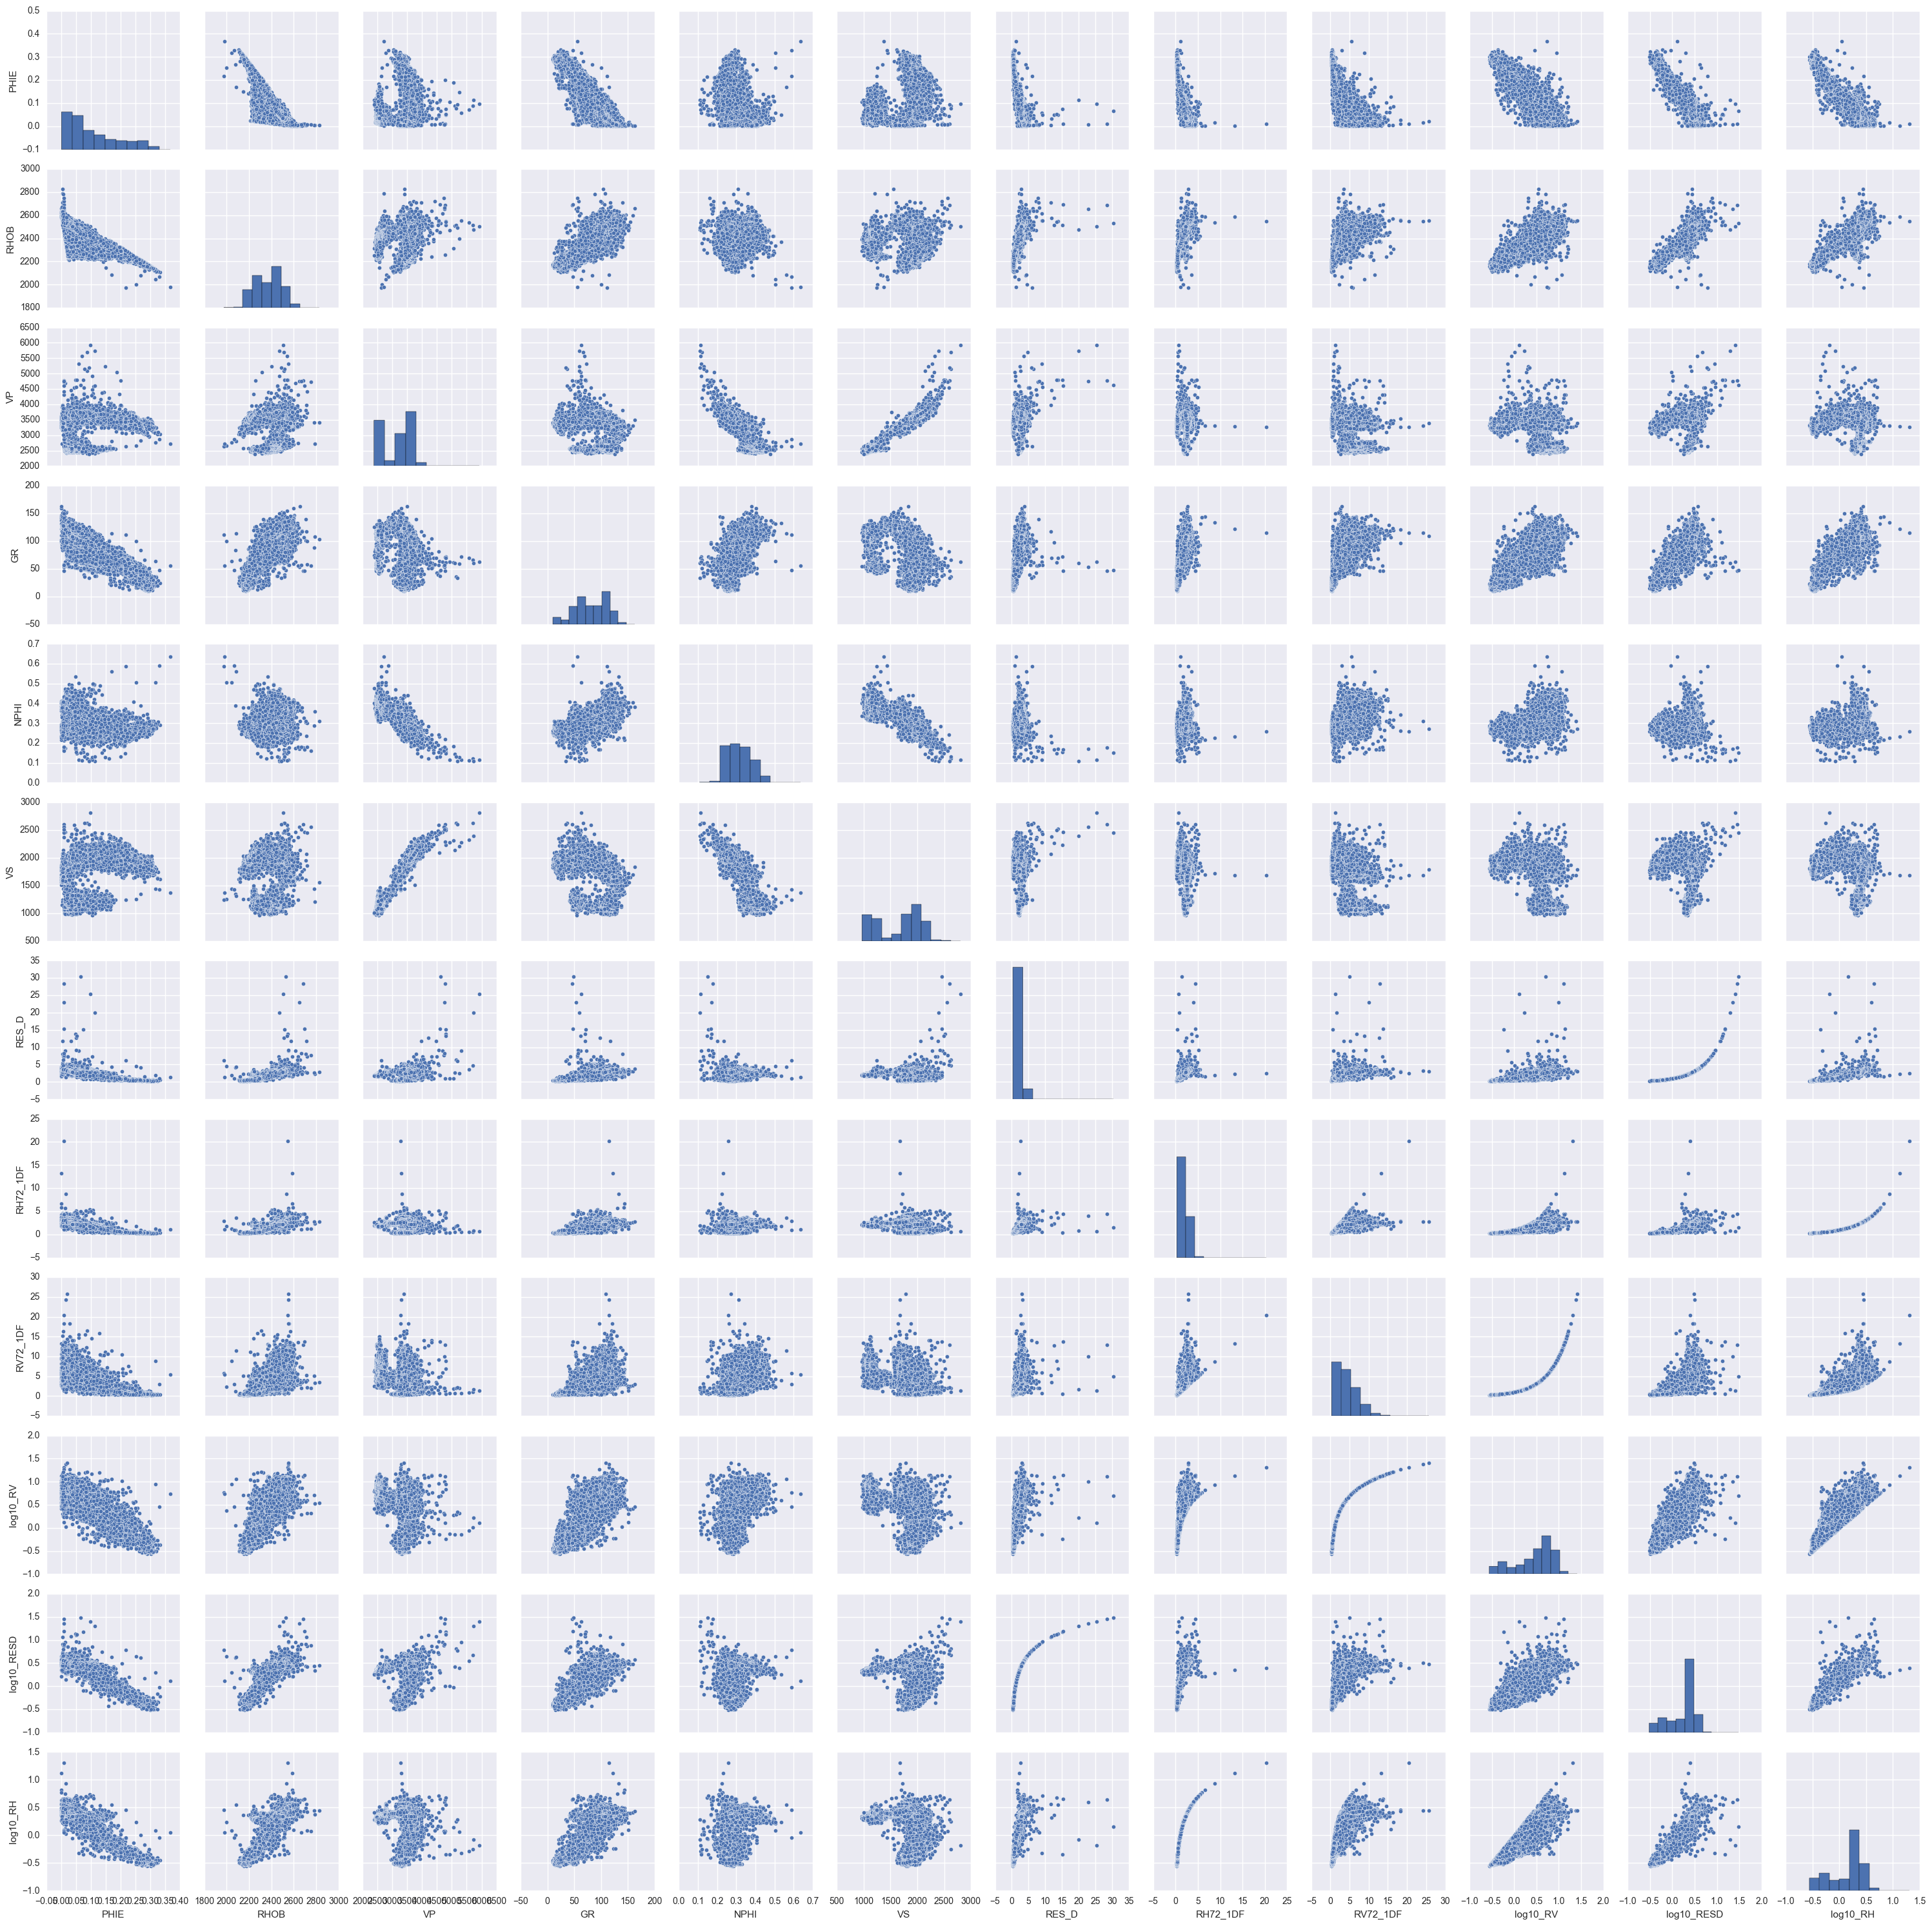

In [535]:
sns.pairplot(df)

Linear Regression

In [536]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [538]:
X = df[['PHIE','RHOB','VP','log10_RESD']]
#X = df.PHIE
y = df.log10_RV

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.7)

In [487]:
#needed for prediction based on a single feature: 
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

In [488]:
y_train.shape

(2162,)

In [489]:
X_train.shape

(2162, 4)

In [490]:
lr = LinearRegression().fit(X_train, y_train)

In [491]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -1.04779899e+00   7.69071403e-04  -2.35272624e-04   6.45334693e-01]
lr.intercept_: -0.6589622118956102


In [492]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


In [493]:
# Calculate RSS
((y_test - lr.predict(X_test)) **2).sum()

170.19184073172624

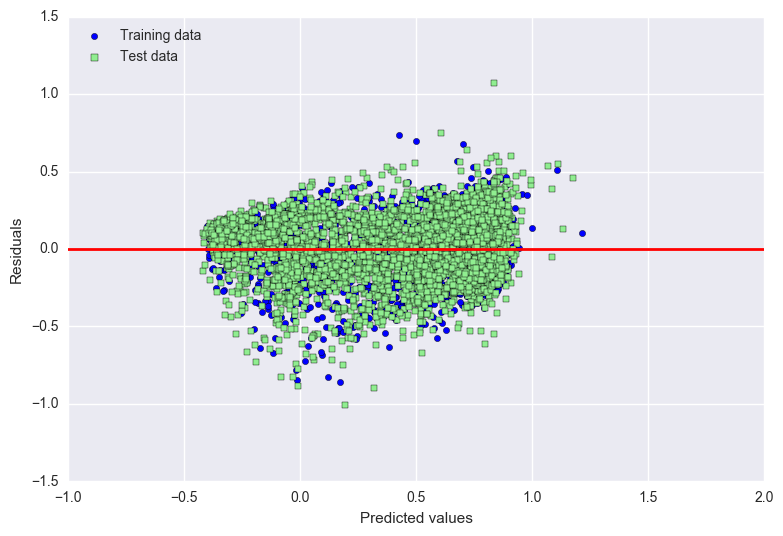

In [494]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-1, 2])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [495]:
y_pred = lr.predict(X)
df['pred_RV'] = 10**y_pred

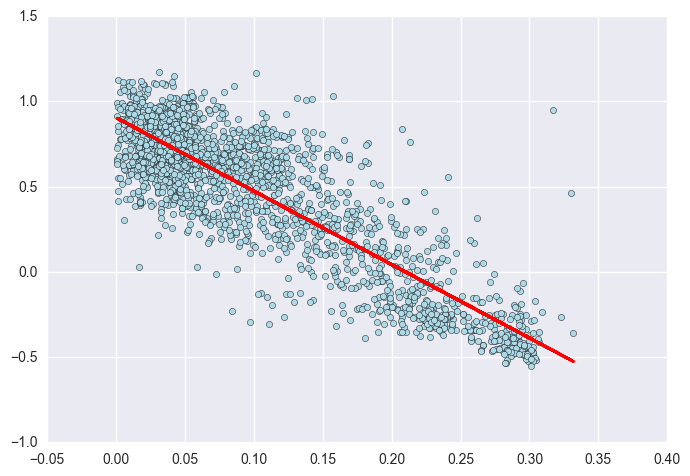

In [431]:
#lin_regplot(X_train, y_train, lr)

In [496]:
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.index >= top_depth) & (df.index <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)
    
#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        #for (i,j) in zip(tops_depths,tops):
        #    if ((i>=top_depth) and (i<=bottom_depth)):
        #        axes.axhline(y=i, linewidth=0.5, color='black')
        #        axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
#1st track: VP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(logs.VP.min(),logs.VP.max())
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("VP [m/s]")
    ax01.plot(logs.VP, logs.index, label='VP[m/s]', color='blue')
    ax01.set_xlabel('VP[m/s]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)        
    
#2nd track: RHOB track
    
    ax11=ax[1].twiny()
    ax11.set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax11.spines['top'].set_position(('outward',0))
    ax11.set_xlabel("RHOB [units]")
    ax11.plot(logs.RHOB, logs.index, label='RHOB[units]', color='blue')
    ax11.set_xlabel('RHOB[units]',color='blue')    
    ax11.tick_params(axis='x', colors='blue')
    ax11.grid(True)  

#3rd track: PHIE track
    
    ax21=ax[2].twiny()
    ax21.set_xlim(0,0.4)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel("PHIE [units]")
    ax21.plot(logs.PHIE, logs.index, label='PHIE[units]', color='blue')
    ax21.set_xlabel('PHIE[units]',color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    ax21.grid(True)
    
    #ax22=ax[2].twiny()
    #ax22.set_xlim(0,1)
    #ax22.spines['top'].set_position(('outward',40))
    #ax22.set_xlabel("SW [units]")
    #ax22.plot(logs.SW, logs.index, label='SW[units]', color='black')
    #ax22.set_xlabel('SW[units]',color='black')    
    #ax22.tick_params(axis='x', colors='black')
    #ax22.grid(True)  
    
#2nd track: Resistivities

    ax31=ax[3].twiny()
    ax31.set_xlim(0.2,200)
    ax31.set_xscale('log')
    ax31.grid(True)
    ax31.spines['top'].set_position(('outward',40))
    ax31.set_xlabel('RES_D[m.ohm]', color='blue')
    ax31.plot(logs.RES_D, logs.index, label='RES_D[m.ohm]', color='blue')
    ax31.tick_params(axis='x', colors='blue')    
    
    ax32=ax[3].twiny()
    ax32.set_xlim(0.2,200)
    ax32.set_xscale('log')
    ax32.plot(logs.RV72_1DF, logs.index, label='RV72_1DF[m.ohm]', color='black') 
    ax32.spines['top'].set_position(('outward',0))
    ax32.set_xlabel('RV72_1DF[m.ohm]', color='black')    
    ax32.tick_params(axis='x', colors='black')

    ax33=ax[3].twiny()
    ax33.set_xlim(0.2,200)
    ax33.set_xscale('log')
    ax33.grid(True)
    ax33.spines['top'].set_position(('outward',80))
    ax33.set_xlabel('pred_RV[m.ohm]', color='red')
    ax33.plot(logs.pred_RV, logs.index, label='pred_RV[m.ohm]', color='red')
    ax33.tick_params(axis='x', colors='red') 

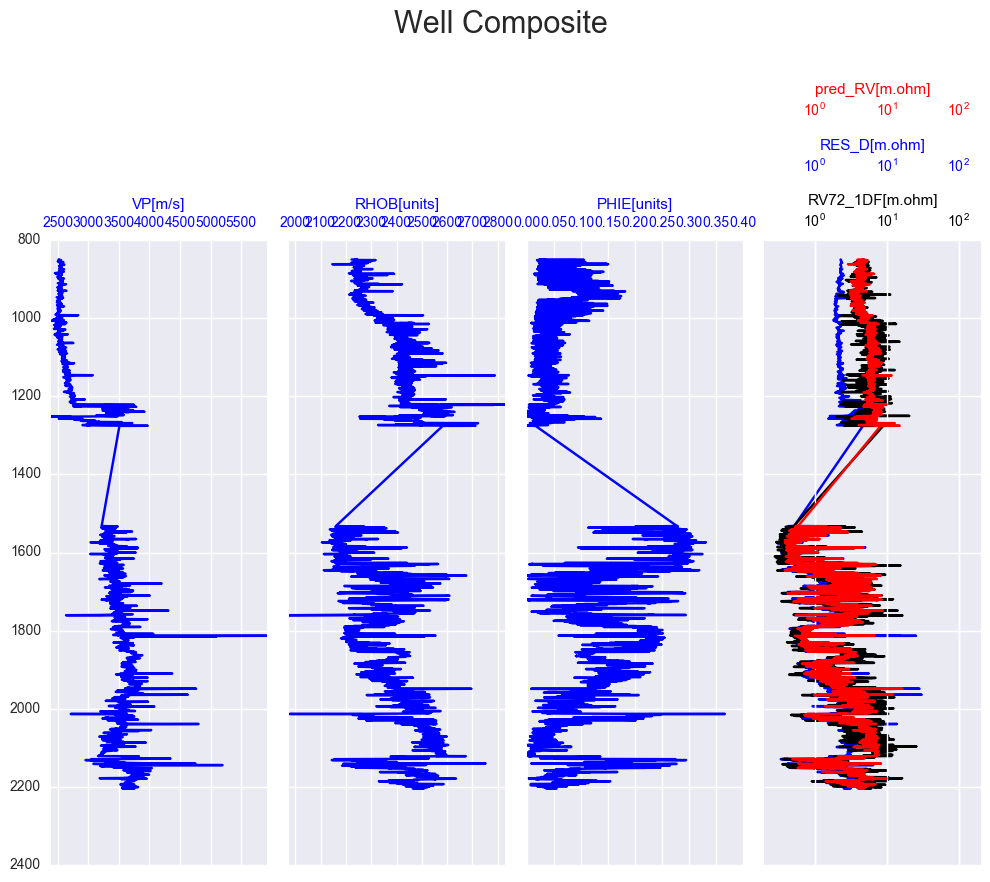

In [497]:
triple_combo_plot(df.index.min(),df.index.max())
#triple_combo_plot(900,1600)
plt.show()